# Library

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import random


import os
import time

import datetime
import calendar

from sklearn.metrics import mean_squared_error


import sklearn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import KFold, StratifiedKFold


from sklearn import clone
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# from utils_model import * # expand later

In [2]:
# np.set_seed(0)

# Preprocess

In [3]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
# data['gender'] = data['gender'].astype('str')
# data_test['gender'] = data_test['gender'].astype('str')

# data['Achievement_above_100%_during3quartal'] = data['Achievement_above_100%_during3quartal'].astype(str)
# data_test['Achievement_above_100%_during3quartal'] = data_test['Achievement_above_100%_during3quartal'].astype(str)

data = data.rename(columns={'annual leave':'annual_leave'})
data_test = data_test.rename(columns={'annual leave':'annual_leave'})

data = data.rename(columns={'Last_achievement_%':'Last_achievement','marital_status_maried(Y/N)':'marital_status_maried',
                           'Achievement_above_100%_during3quartal':'Achievement_above_100_during3quartal'})
data_test = data_test.rename(columns={'Last_achievement_%':'Last_achievement','marital_status_maried(Y/N)':'marital_status_maried',
                           'Achievement_above_100%_during3quartal':'Achievement_above_100_during3quartal'})


data['gender_str'] = data['gender'].astype('str')
data_test['gender_str'] = data_test['gender'].astype('str')

data['Achievement_above_100_during3quartal_str'] = data['Achievement_above_100_during3quartal'].astype(str)
data_test['Achievement_above_100_during3quartal_str'] = data_test['Achievement_above_100_during3quartal'].astype(str)


data['person_level_ordinary'] = LE.fit_transform(data['person_level'])
data['job_level_ordinary'] = LE.fit_transform(data['job_level'])
data['Education_level_ordinary'] = LE.fit_transform(data['Education_level'])

data_test['person_level_ordinary'] = LE.fit_transform(data_test['person_level'])
data_test['job_level_ordinary'] = LE.fit_transform(data_test['job_level'])
data_test['Education_level_ordinary'] = LE.fit_transform(data_test['Education_level'])

# drop = ['age', 'job_duration_from_training', 'person_level_ordinary', 'job_level']


# data = data.drop(columns=drop)
# data_test = data_test.drop(columns=drop)
# data = data[~data['Last_achievement_%'].isna()]
# data = data.drop(columns=['job_level'])
# data_test = data_test.drop(columns=['job_level'])





In [4]:
# get test data (for final evaluation)
X_train = data.drop(columns=['Best Performance'])
y_train = data['Best Performance']


In [5]:
# len(X_train),len(X_val)

In [6]:
num_cols = list(X_train.select_dtypes(exclude=['object']))
cat_cols = list(X_train.select_dtypes(include=['object']))
features = list(X_train.columns)
len(num_cols),len(cat_cols),len(features)

(19, 7, 26)

# Kmeans

In [7]:
random_state=42
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state,shuffle=False)


In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from plotly.subplots import make_subplots



In [78]:
# X_train2.shape
%load_ext autoreload

%autoreload 2
import plotly.express as px

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
OH = OneHotEncoder(handle_unknown='ignore')
# imputer = Imputer()


data2 = X_train2.copy()
num_data = data2[num_cols]
median = num_data.median()
cat_data = data2[cat_cols].astype(str)
num_data = num_data.fillna(median)
scaler.fit(num_data)
num_data = pd.DataFrame(scaler.transform(num_data))
OH.fit(cat_data.astype(str))
cat_data = pd.DataFrame(OH.transform(cat_data).toarray())
# num_data = pd.concat([num_data,cat_data],axis=1)

labels = y_train2.astype(str).values

pca = PCA(random_state=0)
num_data_pca = pd.DataFrame(pca.fit_transform(num_data))

fig = px.scatter(num_data_pca,x=0, y=1)


fig.update_traces(marker=dict(size=6,
                              ))

fig.update_layout(yaxis_range=[-5,5],xaxis_range=[-5,13])

fig.update_xaxes(nticks=8)
fig.update_yaxes(nticks=6)


fig.show()

# fig =px.scatter_3d(num_data_pca, x=0, y=1, z=2,
#               color=labels)
# fig.update_traces(marker=dict(size=5,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))
# fig.show()

In [80]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=2, random_state=0)
# kmeans.fit(num_data_pca[[0,1]])

# labels = kmeans.predict(num_data_pca[[0,1]]).astype(str)

# fig = px.scatter(num_data_pca,x=0, y=1,color=labels)


# fig.update_traces(marker=dict(size=6,
#                               ))
# fig.show()

In [81]:
# labels[labels=='0'].shape,labels[labels=='1'].shape

In [82]:
# pca.explained_variance_ratio_

In [83]:
import plotly.express as px

data2 = X_val2.copy()
num_data = data2[num_cols]
cat_data = data2[cat_cols].astype(str)
num_data = num_data.fillna(median)
# scaler.fit(num_data)
num_data = pd.DataFrame(scaler.transform(num_data))
# OH.fit(cat_data.astype(str))
cat_data = pd.DataFrame(OH.transform(cat_data).toarray())
# num_data = pd.concat([num_data,cat_data],axis=1)

num_data_pca = pd.DataFrame(pca.transform(num_data))

fig = px.scatter(num_data_pca,x=0, y=1)


fig.update_traces(marker=dict(size=6,
                              ))

fig.update_layout(yaxis_range=[-5,5],xaxis_range=[-5,13])
fig.update_xaxes(nticks=8)
fig.update_yaxes(nticks=6)


fig.show()


# fig =px.scatter_3d(num_data_pca, x=0, y=1, z=2,
#               color=labels)
# fig.update_traces(marker=dict(size=5,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))
# fig.show()

In [84]:
import plotly.express as px

data2 = data_test.copy()
num_data = data2[num_cols]
cat_data = data2[cat_cols].astype(str)
num_data = num_data.fillna(num_data.median())
scaler.fit(num_data)
num_data = pd.DataFrame(scaler.transform(num_data))
# OH.fit(cat_data.astype(str))
cat_data = pd.DataFrame(OH.transform(cat_data).toarray())
# num_data = pd.concat([num_data,cat_data],axis=1)


# labels = y_train.astype(str).values
# pca = PCA(random_state=0)
# num_data_pca = pd.DataFrame(pca.fit_transform(num_data))
num_data_pca = pd.DataFrame(pca.transform(num_data))

fig = px.scatter(num_data_pca,x=0, y=1,color=None)


fig.update_traces(marker=dict(size=6,
                              ))
fig.update_layout(yaxis_range=[-5,5],xaxis_range=[-5,13])
fig.update_xaxes(nticks=8)
fig.update_yaxes(nticks=6)



fig.show()


# fig =px.scatter_3d(num_data_pca, x=0, y=1, z=2,
#               color=None)
# fig.update_traces(marker=dict(size=5,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))
# fig.show()

NameError: name 'kmeans' is not defined

# Distribution

In [22]:
traindata = data.copy().drop(columns=['Best Performance'])
traindata['is_train'] = 1

testdata = data_test.copy()
testdata['is_train'] = 0
all_data = pd.concat([traindata,testdata],axis=0,ignore_index=True)

In [23]:
all_data['is_train'].value_counts()

1    11153
0     6000
Name: is_train, dtype: int64

In [24]:
a = np.array([1,2,3,4])
print(a.shape)
a[[-1,1]]

(4,)


array([4, 2])

In [9]:
def fast_build_model_FE(X,y,cv,Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced'),random_state=0,shuffle=False):

    num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

    cat_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                    ])

    


    
    
    skf = StratifiedKFold(n_splits=cv,random_state = random_state,shuffle = shuffle)


    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes = []
    data = pd.concat([X,y],axis=1)
    aucs=[]
    
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
        
        add_fe = Feature_Engineering(parameters)
        add_fe.fit(data_train)
        
        X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
        y_train = y.iloc[train_index]
        X_val = add_fe.transform(X.iloc[val_index,:],mode='val')
        y_val = y.iloc[val_index]
        
        num_cols_fe = list(X_train.select_dtypes(exclude='object').columns)
        cat_cols_fe = list(X_train.select_dtypes(include='object').columns)        
        
        print(X_train.shape,X_val.shape,data.shape)
        
        transformer = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols_fe),
            ('cat', cat_transformer, cat_cols_fe)
        ])
        
        main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', model_base)])
        

        
        add_fes.append(add_fe)
        model = clone(main_pipeline)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)[:,1]
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)
        aucs.append(roc_auc_score(y_val.values, pred_proba,average='weighted'))
        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='weighted')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    print(aucs)
    print(np.mean(aucs[:2]))
    return add_fes,pipelines


def fast_build_model_FE_SW(X,y,cv,Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced'),SW=[],random_state=0,shuffle=False):

    num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

    cat_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                    ])

    


    
    
    skf = StratifiedKFold(n_splits=cv,random_state = random_state,shuffle = shuffle)


    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes = []
    data = pd.concat([X,y],axis=1)
    aucs=[]
    predictions = np.zeros(len(y))
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
        
        add_fe = Feature_Engineering(parameters)
        add_fe.fit(data_train)
        
        X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
        y_train = y.iloc[train_index]
        X_val = add_fe.transform(X.iloc[val_index,:],mode='val')
        y_val = y.iloc[val_index]
        
        num_cols_fe = list(X_train.select_dtypes(exclude='object').columns)
        cat_cols_fe = list(X_train.select_dtypes(include='object').columns)        
        
        print(X_train.shape,X_val.shape,data.shape)
        
        transformer = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols_fe),
            ('cat', cat_transformer, cat_cols_fe)
        ])
        
        main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', model_base)])
        

        

        add_fes.append(add_fe)
        model = clone(main_pipeline)
        
        if len(SW)!=0:
            kwargs = {main_pipeline.steps[-1][0] + '__sample_weight': SW[train_index]}
            model.fit(X_train,y_train.values.ravel(),**kwargs)
        else:
            model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)[:,1]
        predictions[val_index] = pred_proba
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)
        aucs.append(roc_auc_score(y_val.values, pred_proba,average='weighted'))
        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='weighted')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    print(aucs)
    print(np.mean(aucs[:2]))
    return add_fes,pipelines,predictions



def fast_build_model_FE_1(X,y,Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced'),SW=[],random_state=0,shuffle=False):

    num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

    cat_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                    ])
    data = pd.concat([X,y],axis=1)
    aucs=[]
    start_fit = time.time()
    data_train = data.copy()
    add_fe = Feature_Engineering(parameters)
    add_fe.fit(data_train)

    X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
    num_cols_fe = list(X_train.select_dtypes(exclude='object').columns)
    cat_cols_fe = list(X_train.select_dtypes(include='object').columns)

    y_train = y

    
    transformer = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols_fe),
        ('cat', cat_transformer, cat_cols_fe)
    ])

    main_pipeline = Pipeline(steps=[('transformer', transformer),
                      ('classifier', model_base)])



#     add_fes.append(add_fe)
    model = clone(main_pipeline)
    
    if len(SW)!=0:
        kwargs = {main_pipeline.steps[-1][0] + '__sample_weight': SW}
        model.fit(X_train,y_train.values.ravel(),**kwargs)
    else:
        model.fit(X_train,y_train.values.ravel())
    
    return [add_fe],[model]



def fast_predict_FE(data,add_fes,pipelines):
    X = data.copy()
#     pred = np.zeros(1,len(X))
    pred_proba = np.zeros((len(X)))
    for i in range(len(pipelines)):
        
        pred_proba += pipelines[i].predict_proba(add_fes[i].transform(X,mode='test'))[:,1] / len(pipelines)
    
    return pred_proba



        

In [10]:
def fast_build_model_FE_automatic_2_pipe(X,y,cv,Feature_Engineering,parameters1,parameters2,model_base=LogisticRegression(class_weight='balanced')):

    num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

    cat_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                    ])

    


    
    
    skf = StratifiedKFold(n_splits=cv,shuffle = False)


    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes1 = []
    add_fes2 = []
    data = pd.concat([X,y],axis=1)
    aucs=[]
#     print(data.columns)
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
#         data_val = data.iloc[val_index,:][features]
        
        add_fe1 = Feature_Engineering(parameters1)
        add_fe2 = Feature_Engineering(parameters2)
        add_fe1.fit(data_train)
        
        X_train = add_fe1.transform(data_train)
        add_fe2.fit(X_train)

        X_train = add_fe2.transform(X_train).drop(columns=[parameters1['target']])
        
        num_cols_fe = list(X_train.select_dtypes(exclude='object').columns)
        cat_cols_fe = list(X_train.select_dtypes(include='object').columns)
        

        y_train = y.iloc[train_index]
        
        X_val = add_fe1.transform(X.iloc[val_index,:],mode='val')
        X_val = add_fe2.transform(X_val,mode='val')
        y_val = y.iloc[val_index]
        
        print(X_train.shape,X_val.shape)
        
        transformer = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols_fe),
            ('cat', cat_transformer, cat_cols_fe)
        ])
        
        main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', model_base)])
        

        
        add_fes1.append(add_fe1)
        add_fes2.append(add_fe2)
        model = clone(main_pipeline)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)[:,1]
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)
        aucs.append(roc_auc_score(y_val.values, pred_proba,average='weighted'))
        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='weighted')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    print(np.mean(aucs))
    return add_fes1,add_fes2,pipelines





In [167]:
# cv=2
cv

2

In [19]:
parameters = {'multiply': [['job_duration_in_current_job_level',
   'job_duration_in_current_person_level'],
  ['job_duration_in_current_job_level', 'branch_rotation'],
  ['job_duration_in_current_job_level', 'job_rotation'],
  ['job_duration_in_current_job_level', 'assign_of_otherposition'],
  ['job_duration_in_current_person_level', 'number_of_dependences'],
  ['job_duration_in_current_person_level', 'assign_of_otherposition'],
  ['job_duration_in_current_branch', 'year_graduated'],
  ['job_duration_in_current_branch', 'assign_of_otherposition'],
  ['job_duration_in_current_branch', 'annual_leave'],
  ['job_duration_in_current_branch', 'Achievement_above_100_during3quartal'],
  ['gender', 'sick_leaves'],
  ['gender', 'Achievement_above_100_during3quartal'],
  ['number_of_dependences', 'assign_of_otherposition'],
  ['number_of_dependences', 'Last_achievement'],
  ['branch_rotation', 'job_level_ordinary'],
  ['job_rotation', 'annual_leave'],
  ['job_rotation', 'sick_leaves'],
  ['job_rotation', 'job_level_ordinary'],
  ['assign_of_otherposition', 'sick_leaves'],
  ['assign_of_otherposition', 'Achievement_above_100_during3quartal'],
  ['annual_leave', 'sick_leaves'],
  ['sick_leaves', 'job_level_ordinary'],
  ['Last_achievement', 'Achievement_above_100_during3quartal']],
 'add': [['job_duration_in_current_job_level', 'job_level_ordinary']],
 'add_str': [['person_level', 'gender_str'],
  ['marital_status_maried', 'gender_str'],
  ['marital_status_maried', 'Achievement_above_100_during3quartal_str']],
 'substract': [['number_of_dependences',
   'Achievement_above_100_during3quartal']],
 'divide': [['job_duration_in_current_job_level', 'assign_of_otherposition'],
  ['job_duration_in_current_job_level', 'sick_leaves'],
  ['job_duration_in_current_job_level', 'Last_achievement'],
  ['job_duration_in_current_branch', 'Last_achievement'],
  ['gender', 'sick_leaves'],
  ['number_of_dependences', 'sick_leaves'],
  ['GPA', 'Last_achievement'],
  ['branch_rotation', 'Achievement_above_100_during3quartal'],
  ['job_rotation', 'assign_of_otherposition'],
  ['job_rotation', 'Last_achievement'],
  ['Achievement_above_100_during3quartal', 'job_level_ordinary'],
  ['Achievement_above_100_during3quartal', 'Education_level_ordinary']],
 'bin_numer_qcut': [['job_duration_in_current_branch', 5],
  ['GPA', 5],
  ['Last_achievement', 10]],
 'bin_numer_cut': [['job_duration_in_current_branch', 5],
  ['number_of_dependences', 5],
  ['branch_rotation', 5],
  ['job_rotation', 5],
  ['Last_achievement', 5]],
 'bin_add_categ_numer_bin_cut': [['Employee_type',
   'job_duration_in_current_job_level',
   10],
  ['Education_level', 'job_duration_in_current_job_level', 10],
  ['marital_status_maried', 'job_duration_in_current_branch', 10],
  ['Education_level', 'job_duration_in_current_branch', 10],
  ['Achievement_above_100_during3quartal_str',
   'job_duration_in_current_branch',
   10],
  ['Education_level', 'year_graduated', 10],
  ['Employee_type', 'branch_rotation', 10],
  ['Education_level', 'branch_rotation', 10],
  ['gender_str', 'job_rotation', 10],
  ['Employee_type', 'annual_leave', 10],
  ['Employee_type', 'Last_achievement', 10]],
 'bin_add_categ_numer_bin_qcut': [['marital_status_maried',
   'job_duration_in_current_branch',
   10],
  ['Education_level', 'year_graduated', 10],
  ['Achievement_above_100_during3quartal_str', 'year_graduated', 10],
  ['Employee_type', 'Last_achievement', 10],
  ['marital_status_maried', 'Last_achievement', 10]],
 'bin_target_encoding_cut': [['job_duration_in_current_branch', 20],
  ['year_graduated', 10],
  ['job_rotation', 5]],
 'bin_target_encoding_qcut': [],
 'bin_target_encoding_custom_bin': [],
 'categorical_mean_encoding': [],
 'target': 'is_train'}

cv=5
add_fes,pipelines,SW = fast_build_model_FE_SW(all_data.drop(columns=['is_train']),all_data['is_train'],cv,
                    Feature_Engineering,parameters,model_base=RandomForestClassifier(class_weight='balanced'))

weights = (1./SW[len(testdata):]) - 1
weights /= np.mean(weights)
weights

(13722, 82) (3431, 82) (17153, 27)
Fit iteration 0 done in : 27.114550590515137
(13722, 82) (3431, 82) (17153, 27)
Fit iteration 1 done in : 26.889259099960327
(13722, 82) (3431, 82) (17153, 27)
Fit iteration 2 done in : 26.69901442527771
(13723, 82) (3430, 82) (17153, 27)
Fit iteration 3 done in : 27.417139291763306
(13723, 82) (3430, 82) (17153, 27)
Fit iteration 4 done in : 27.16635537147522
PRec Rec AUC average : [0.37679083 0.65135217] [0.04383333 0.96099704] <==> 0.5069127215397949
[0.5392103690422829, 0.5012697968026296, 0.5083329598087554, 0.48589405829596416, 0.4996027653213752]
0.5202400829224563


In [220]:
importances = pipelines[0]['classifier'].feature_importances_
all_cols = num_cols.copy()
all_cols.extend(pipelines[0]['transformer'].transformers_[1][1].named_steps['onehot'].get_feature_names(cat_cols).tolist())

Text(0.5, 0, 'Relative Importance')

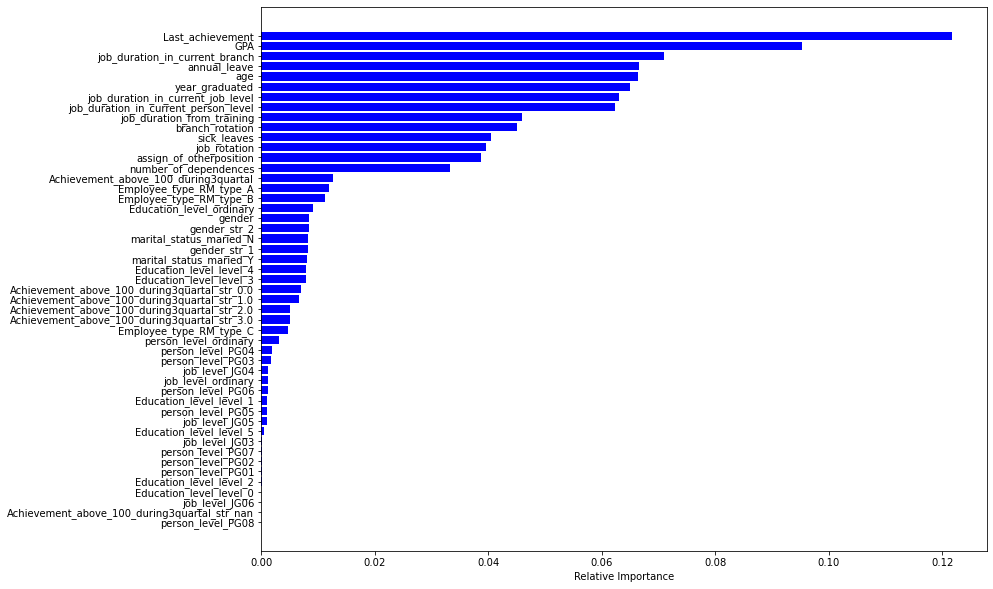

In [228]:
indices = np.argsort(importances)
plt.figure(figsize=(13,10))

plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [all_cols[i] for i in indices])
plt.xlabel('Relative Importance')

In [232]:
parameters = {'multiply':[],
              'add':[],
              'add_str':[],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'Best Performance'}
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced',random_state=0,max_iter=10000,C=1))


(8922, 26) (2231, 26) (11153, 27)
Fit iteration 0 done in : 1.0890915393829346
(8922, 26) (2231, 26) (11153, 27)
Fit iteration 1 done in : 0.9759011268615723
(8922, 26) (2231, 26) (11153, 27)
Fit iteration 2 done in : 1.2725627422332764
(8923, 26) (2230, 26) (11153, 27)
Fit iteration 3 done in : 1.0282535552978516
(8923, 26) (2230, 26) (11153, 27)
Fit iteration 4 done in : 0.9325332641601562
PRec Rec AUC average : [0.86201629 0.15662422] [0.53373266 0.5033598 ] <==> 0.5328404233438432
[0.5370040217922031, 0.5354238493777477, 0.5467442292657293, 0.5414097489719274, 0.5062857455072548]
0.5362139355849753


In [ ]:
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced',random_state=0,max_iter=10000,C=1))


In [93]:
parameters = {'multiply':[],
              'add':[],
              'add_str':[],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'is_train'}


# 4 mayan 7 best, 9 JUGA 
cv=10
random_state=42
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state,shuffle=False)
# X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=2,shuffle=True)
# X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.5, random_state=1,shuffle=True)
traindata2 = X_train2.copy()
traindata2['is_train'] = 1

valdata2 = X_val2.copy()
valdata2['is_train'] = 0
all_data2 = pd.concat([traindata2,valdata2],axis=0,ignore_index=True)
add_fes,pipelines,SW = fast_build_model_FE_SW(all_data2.drop(columns=['is_train']),all_data2['is_train'],cv,
                    Feature_Engineering,parameters,model_base=RandomForestClassifier(random_state=random_state,n_estimators=100),random_state=random_state)


C:\Users\BIGDATA02\.conda\envs\ojtaa\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



(10037, 26) (1116, 26) (11153, 27)
Fit iteration 0 done in : 2.8783047199249268
(10037, 26) (1116, 26) (11153, 27)
Fit iteration 1 done in : 2.732494831085205
(10037, 26) (1116, 26) (11153, 27)
Fit iteration 2 done in : 3.0474634170532227
(10038, 26) (1115, 26) (11153, 27)
Fit iteration 3 done in : 2.9071571826934814
(10038, 26) (1115, 26) (11153, 27)
Fit iteration 4 done in : 2.9239919185638428
(10038, 26) (1115, 26) (11153, 27)
Fit iteration 5 done in : 2.977513074874878
(10038, 26) (1115, 26) (11153, 27)
Fit iteration 6 done in : 3.285233736038208
(10038, 26) (1115, 26) (11153, 27)
Fit iteration 7 done in : 3.3770573139190674
(10038, 26) (1115, 26) (11153, 27)
Fit iteration 8 done in : 3.442551374435425
(10038, 26) (1115, 26) (11153, 27)
Fit iteration 9 done in : 3.3151679039001465
PRec Rec AUC average : [0.5006605  0.82185456] [0.16987898 0.95763282] <==> 0.7471683471002385
[0.9486589768955352, 0.9987546387196882, 0.7765004404228059, 0.7079847774940176, 0.7794672122906151, 0.650819

In [99]:
parameters = {'multiply':[],
              'add':[],
              'add_str':[],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'is_train'}


In [100]:
all_data2 = pd.concat([traindata2,testdata],axis=0)
add_fes,pipelines = fast_build_model_FE(all_data2.drop(columns=['is_train']),all_data2['is_train'],cv,
                    Feature_Engineering,parameters,model_base=RandomForestClassifier(random_state=random_state,class_weight='balanced'),random_state=random_state)



valdata2['is_train'] = 1
all_data2 = pd.concat([valdata2,testdata],axis=0)
add_fes,pipelines = fast_build_model_FE(all_data2.drop(columns=['is_train']),all_data2['is_train'],cv,
                    Feature_Engineering,parameters,model_base=RandomForestClassifier(random_state=random_state,class_weight='balanced'),random_state=random_state)


C:\Users\BIGDATA02\.conda\envs\ojtaa\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



(11937, 26) (2985, 26) (14922, 27)
Fit iteration 0 done in : 4.2550458908081055
(11937, 26) (2985, 26) (14922, 27)
Fit iteration 1 done in : 4.587532997131348
(11938, 26) (2984, 26) (14922, 27)
Fit iteration 2 done in : 4.907033443450928
(11938, 26) (2984, 26) (14922, 27)
Fit iteration 3 done in : 4.1348066329956055
(11938, 26) (2984, 26) (14922, 27)
Fit iteration 4 done in : 4.413037300109863
PRec Rec AUC average : [0.26094276 0.50456468] [0.25833333 0.50795786] <==> 0.3267734439213928
[0.08871965452847808, 0.3617936507936508, 0.4159664611360239, 0.4181903961136024, 0.4071583053064275]
0.22525665266106443
(6584, 26) (1647, 26) (8231, 27)


C:\Users\BIGDATA02\.conda\envs\ojtaa\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Fit iteration 0 done in : 2.153163194656372
(6585, 26) (1646, 26) (8231, 27)
Fit iteration 1 done in : 1.8166909217834473
(6585, 26) (1646, 26) (8231, 27)
Fit iteration 2 done in : 2.095438241958618
(6585, 26) (1646, 26) (8231, 27)
Fit iteration 3 done in : 2.1961100101470947
(6585, 26) (1646, 26) (8231, 27)
Fit iteration 4 done in : 1.8081674575805664
PRec Rec AUC average : [0.73798328 0.39130435] [0.94166667 0.10085164] <==> 0.6834278724040042
[0.640041014168531, 0.6552027279521674, 0.729173206278027, 0.7427886771300448, 0.6573533258594918]
0.6476218710603492


# Sample weight brow

In [60]:
SW[len(y_val2):].shape

(8922,)

In [61]:
SW[:len(y_train2)].shape

(8922,)

In [62]:
X_train2.shape

(8922, 26)

In [94]:
# weights = (1./SW[len(y_val2):]) - 1
weights = (1./SW[:len(y_train2)]) - 1

weights /= np.mean(weights)
weights

array([0.58609412, 0.7290439 , 0.58609412, ..., 1.63581493, 1.35654648,
       2.21413334])

C:\Users\BIGDATA02\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

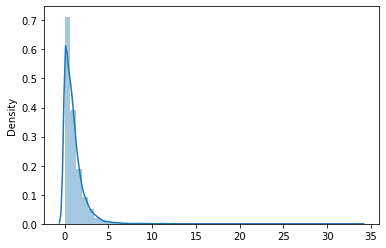

In [95]:
sns.distplot(weights)

In [102]:
parameters = {'multiply':[],
              'add':[],
              'add_str':[],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'Best Performance'}
cv=10
add_fes,pipelines,_ = fast_build_model_FE_SW(X_train2,y_train2,cv,
                    Feature_Engineering,parameters,model_base=LogisticRegression(random_state=0,max_iter=10000,C=1))

# add_fes,pipelines,_ = fast_build_model_FE_SW(X_train2,y_train2,cv,
#                     Feature_Engineering,parameters,model_base=RandomForestClassifier(random_state=0))

# add_fes,pipelines = fast_build_model_FE_1(X_train2,y_train2,
#                     Feature_Engineering,parameters,model_base=LogisticRegression(random_state=0,max_iter=10000,C=1))

# add_fes,pipelines = fast_build_model_FE_1(X_train2,y_train2,
#                     Feature_Engineering,parameters,model_base=RandomForestClassifier(random_state=0))


pred_proba = fast_predict_FE(X_val2.copy(),add_fes,pipelines)
roc_auc_score(y_val2.values, pred_proba,average='weighted')


C:\Users\BIGDATA02\.conda\envs\ojtaa\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



(8029, 26) (893, 26) (8922, 27)
Fit iteration 0 done in : 1.4142262935638428
(8029, 26) (893, 26) (8922, 27)
Fit iteration 1 done in : 2.3762035369873047
(8030, 26) (892, 26) (8922, 27)
Fit iteration 2 done in : 2.2091357707977295
(8030, 26) (892, 26) (8922, 27)
Fit iteration 3 done in : 1.7947173118591309
(8030, 26) (892, 26) (8922, 27)
Fit iteration 4 done in : 2.4754114151000977
(8030, 26) (892, 26) (8922, 27)
Fit iteration 5 done in : 1.6246850490570068
(8030, 26) (892, 26) (8922, 27)
Fit iteration 6 done in : 2.1462454795837402
(8030, 26) (892, 26) (8922, 27)
Fit iteration 7 done in : 2.4260342121124268
(8030, 26) (892, 26) (8922, 27)
Fit iteration 8 done in : 1.5019941329956055
(8030, 26) (892, 26) (8922, 27)
Fit iteration 9 done in : 2.0435431003570557
PRec Rec AUC average : [0.85093028 0.        ] [1. 0.] <==> 0.5279123454051357
[0.5192026117926395, 0.545567867036011, 0.46784946556113605, 0.5416406629221274, 0.5530030610122143, 0.5700714236183344, 0.4766659732334789, 0.57004170

C:\Users\BIGDATA02\.conda\envs\ojtaa\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.5231026566531453

In [89]:
len([])

0

In [97]:
parameters = {'multiply':[],
              'add':[],
              'add_str':[],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'Best Performance'}
cv=5
# add_fes,pipelines,_ = fast_build_model_FE_SW(X_train2,y_train2,cv,
#                     Feature_Engineering,parameters,model_base=LogisticRegression(random_state=0,max_iter=10000,C=1),SW=weights)

# add_fes,pipelines,_ = fast_build_model_FE_SW(X_train2,y_train2,cv,
#                     Feature_Engineering,parameters,model_base=RandomForestClassifier(random_state=0),SW=weights)

# add_fes,pipelines = fast_build_model_FE_1(X_train2,y_train2,
#                     Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced',random_state=0,max_iter=10000,C=1),SW=weights)

add_fes,pipelines = fast_build_model_FE_1(X_train2,y_train2,
                    Feature_Engineering,parameters,model_base=RandomForestClassifier(random_state=0),SW=weights)


pred_proba = fast_predict_FE(X_val2.copy(),add_fes,pipelines)
roc_auc_score(y_val2.values, pred_proba,average='weighted')


0.534284911320742

# FE

In [8]:
class Feature_Engineering:
    def __init__(self,parameters):
        self.parameters = parameters
        self.target = parameters['target']
    
    @staticmethod  
    def check_col(col):
        if len(col.split(' '))>1:
            col2 = '_'.join(col.split(' '))
        else:
            col2 = col
        return col2
    
    @staticmethod
    def get_bin(data,col,n_bin,mode='cut'):
        while True:
            try:
                if mode=='cut':
                    _,bin_dummy = pd.cut(data[col],n_bin,retbins=True)
                else:
                    _,bin_dummy = pd.qcut(data[col],n_bin,retbins=True)
            except:
                n_bin -= 1
                continue
            break
        return bin_dummy
        
    def fit(self,data_ori):
        target = self.target
        data = data_ori.copy()
        for param in self.parameters['bin_numer_qcut']:
            col = param[0]
            n_bin = param[1]
            bin_dummy = self.get_bin(data,col,n_bin,mode='qcut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_numer_qcut',bin_dummy)
        for param in self.parameters['bin_numer_cut']:
            col = param[0]
            n_bin = param[1]
            bin_dummy = self.get_bin(data,col,n_bin,mode='cut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_numer_cut',bin_dummy)
            
            
        for param in self.parameters['bin_add_categ_numer_bin_cut']:
            col = param[1]
            n_bin = param[2]
            bin_dummy = self.get_bin(data,col,n_bin,mode='cut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_cut_add_categ',bin_dummy)
            
        for param in self.parameters['bin_add_categ_numer_bin_qcut']:
            col = param[1]
            n_bin = param[2]
            bin_dummy = self.get_bin(data,col,n_bin,mode='qcut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_qcut_add_categ',bin_dummy)
        
        for param in self.parameters['bin_target_encoding_cut']:
            col = param[0]
            n_bin = param[1]
            bin_dummy = self.get_bin(data,col,n_bin,mode='cut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_cut',bin_dummy)
            
            data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_cut'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_cut',data_dummy)
            
        for param in self.parameters['bin_target_encoding_qcut']:
            col = param[0]
            n_bin = param[1]
            bin_dummy = self.get_bin(data,col,n_bin,mode='qcut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_qcut',bin_dummy)
            
            data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_qcut'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_qcut',data_dummy)
           
        for param in self.parameters['bin_target_encoding_custom_bin']:
            col = param[0]
            bins = param[1]
            setattr(self,f'{col}_bin_custom_bin',bins)
            
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.cut(data[col],bins=bins)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_custom_bin'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_custom_bin',data_dummy)
        
        for param in self.parameters['categorical_mean_encoding']:
            col = param
            data[f'{col}_categorical_mean_encoding'] = data[col].copy().values
            data_dummy = data.groupby([f'{col}_categorical_mean_encoding'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_categorical_mean_encoding',data_dummy)
        
        
        
        self.fit = True
        return data
        
    
    def transform(self,X,mode='train'):
        data = X.copy()
        target = self.target
        if mode!='train':
            target_encode = self.target
        else:
            target_encode = self.target +"_y"
            
        if self.fit==False:
            raise Exception("Fit to train data first")
        
        for param in self.parameters['bin_numer_qcut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_numer_qcut')
            data[f'{col}_bin_numer_qcut'] = pd.cut(data[col],bins=bin_dummy).astype(str).values
        for param in self.parameters['bin_numer_cut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_numer_cut')
            data[f'{col}_bin_numer_cut'] = pd.cut(data[col],bins=bin_dummy).astype(str).values
            
        for cols in self.parameters['bin_add_categ_numer_bin_cut']:
            col_add = cols[0] + '_' + cols[1]
            bin_dummy = eval(f'self.{cols[1]}_bin_cut_add_categ')
            data[f'{col_add}_bin_add_categ_numer_bin_cut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
            data[f'{col_add}_bin_add_categ_numer_bin_cut'] = (data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_cut'].astype(str)).values
            
        for cols in self.parameters['bin_add_categ_numer_bin_qcut']:
            col_add = cols[0] + '_' + cols[1]
            bin_dummy = eval(f'self.{cols[1]}_bin_qcut_add_categ')
            data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
            data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = (data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)).values
        
        for param in self.parameters['bin_target_encoding_cut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_cut')
            data_dummy = eval(f'self.{col}_bin_target_encoding_cut')
            data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy).values
            data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
        
        for param in self.parameters['bin_target_encoding_qcut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_qcut')
            data_dummy = eval(f'self.{col}_bin_target_encoding_qcut')
            data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy).values
            data[f'{col}_bin_target_encoding_qcut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_qcut'])[f'{target_encode}'].values
        
        for param in self.parameters['bin_target_encoding_custom_bin']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_custom_bin')
            data_dummy = eval(f'self.{col}_bin_target_encoding_custom_bin')
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.cut(data[col],bins=bin_dummy).values
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_custom_bin'])[f'{target_encode}'].values
        
        for param in self.parameters['categorical_mean_encoding']:
            col = param
            data_dummy = eval(f'self.{col}_categorical_mean_encoding')
            data[f'{col}_categorical_mean_encoding'] = data[col].copy().values
            data[f'{col}_categorical_mean_encoding'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_categorical_mean_encoding'])[f'{target_encode}'].values
        
        
        for cols in self.parameters['multiply']:
            data[cols[0] + '_times_' +cols[1]] = (data[cols[0]] * data[cols[1]]).values
        for cols in self.parameters['add']:
            data[cols[0] + '_plus_' +cols[1]] = (data[cols[0]] + data[cols[1]]).values
        for cols in self.parameters['add_str']:
            data[cols[0] + '_plus_' +cols[1]] = (data[cols[0]].astype(str)+'_' + data[cols[1]].astype(str)).values
            
        for cols in self.parameters['substract']:
            data[cols[0] + '_minus_' +cols[1]] = (data[cols[0]] - data[cols[1]]).values
        for cols in self.parameters['divide']:
            data[cols[0] + '_divide_' +cols[1]] = (data[cols[0]] / np.where(data[cols[1]]==0,0.0001,data[cols[1]])).values
        
        
        
        
        return data
    
    

In [54]:
# import copy
# parameters2 = copy.deepcopy(parameters)
# parameters2['target'] = 'is_train'
# traindata2 = X_train2.copy()
# traindata2['is_train'] = 1

# testdata = data_test.copy()
# testdata['is_train'] = 0
# all_data = pd.concat([traindata2,testdata],axis=0,ignore_index=True)

# cv=10
# add_fes,pipelines,SW = fast_build_model_FE_SW(all_data.drop(columns=['is_train']),all_data['is_train'],cv,
#                     Feature_Engineering,parameters2,model_base=RandomForestClassifier(random_state=0,class_weight='balanced'))



# weights = (1./SW[:len(traindata2)]) - 1
# weights /= np.mean(weights)
# print(weights.shape)
# weights

(11937, 82) (2985, 82) (14922, 27)
Fit iteration 0 done in : 26.762933015823364
(11937, 82) (2985, 82) (14922, 27)
Fit iteration 1 done in : 28.340144872665405
(11938, 82) (2984, 82) (14922, 27)
Fit iteration 2 done in : 29.22557234764099
(11938, 82) (2984, 82) (14922, 27)
Fit iteration 3 done in : 30.705522060394287
(11938, 82) (2984, 82) (14922, 27)
Fit iteration 4 done in : 30.34020686149597
PRec Rec AUC average : [0.39923954 0.5974411 ] [0.14       0.85832773] <==> 0.5008081427930957
[0.5058522408963585, 0.5010030345471522, 0.5133959267563527, 0.4771274757100149, 0.5073091834828102]
0.5034276377217554
(8922,)


array([1.45431761, 1.45431761, 1.45431761, ..., 1.14323363, 1.0540926 ,
       0.97099504])

In [28]:
# 5.81
parameters = {'multiply': [['job_duration_in_current_job_level', 'job_rotation'],
  ['annual_leave', 'Achievement_above_100_during3quartal'],
  ['Last_achievement', 'Achievement_above_100_during3quartal'],
  ['gender', 'job_duration_from_training'],
  ['job_rotation', 'Last_achievement']],
 'add': [],
 'add_str': [],
 'substract': [],
 'divide': [],
 'bin_numer_qcut': [['job_duration_in_current_branch', 10]],
 'bin_numer_cut': [],
 'bin_add_categ_numer_bin_cut': [['gender_str',
   'job_duration_in_current_job_level',
   10],
  ['marital_status_maried', 'job_duration_in_current_branch', 10],
  ['marital_status_maried', 'assign_of_otherposition', 10]],
 'bin_add_categ_numer_bin_qcut': [],
 'bin_target_encoding_cut': [['branch_rotation', 20]],
 'bin_target_encoding_qcut': [],
 'bin_target_encoding_custom_bin': [],
 'categorical_mean_encoding': [],
 'target': 'Best Performance'}


# 0.56
parameters = {'multiply': [['job_duration_in_current_job_level',
   'job_duration_in_current_person_level'],
  ['job_duration_in_current_branch', 'assign_of_otherposition'],
  ['number_of_dependences', 'assign_of_otherposition']],
 'add': [['gender', 'number_of_dependences']],
 'add_str': [],
 'substract': [],
 'divide': [['job_duration_in_current_job_level', 'Last_achievement'],
  ['number_of_dependences', 'sick_leaves'],
  ['job_rotation', 'assign_of_otherposition']],
 'bin_numer_qcut': [['job_duration_in_current_branch', 5]],
 'bin_numer_cut': [['job_duration_in_current_branch', 5],
  ['Last_achievement', 5]],
 'bin_add_categ_numer_bin_cut': [['Employee_type',
   'job_duration_in_current_job_level',
   10]],
 'bin_add_categ_numer_bin_qcut': [['Employee_type', 'Last_achievement', 10]],
 'bin_target_encoding_cut': [['year_graduated', 10]],
 'bin_target_encoding_qcut': [],
 'bin_target_encoding_custom_bin': [],
 'categorical_mean_encoding': [],
 'target': 'Best Performance'}

# 5.68
parameters = {'multiply': [['job_duration_in_current_job_level',
   'job_duration_in_current_person_level'],
  ['job_duration_in_current_job_level', 'branch_rotation'],
  ['job_duration_in_current_job_level', 'assign_of_otherposition'],
  ['job_duration_in_current_person_level', 'assign_of_otherposition'],
  ['job_duration_in_current_branch', 'assign_of_otherposition'],
  ['job_duration_in_current_branch', 'Achievement_above_100_during3quartal'],
  ['number_of_dependences', 'assign_of_otherposition'],
  ['number_of_dependences', 'Last_achievement'],
  ['assign_of_otherposition', 'sick_leaves'],
  ['Last_achievement', 'Achievement_above_100_during3quartal']],
 'add': [['gender', 'number_of_dependences']],
 'add_str': [['person_level', 'gender_str'],
  ['marital_status_maried', 'gender_str']],
 'substract': [],
 'divide': [['job_duration_in_current_job_level', 'assign_of_otherposition'],
  ['job_duration_in_current_job_level', 'sick_leaves'],
  ['job_duration_in_current_job_level', 'Last_achievement'],
  ['gender', 'sick_leaves'],
  ['branch_rotation', 'Achievement_above_100_during3quartal'],
  ['job_rotation', 'assign_of_otherposition'],
  ['Achievement_above_100_during3quartal', 'Education_level_ordinary']],
 'bin_numer_qcut': [['job_duration_in_current_branch', 5],
  ['Last_achievement', 10]],
 'bin_numer_cut': [['job_duration_in_current_branch', 5],
  ['number_of_dependences', 5],
  ['branch_rotation', 5],
  ['Last_achievement', 5]],
 'bin_add_categ_numer_bin_cut': [['Employee_type',
   'job_duration_in_current_job_level',
   10],
  ['marital_status_maried', 'job_duration_in_current_branch', 10],
  ['Education_level', 'year_graduated', 10],
  ['Employee_type', 'branch_rotation', 10],
  ['Education_level', 'branch_rotation', 10],
  ['gender_str', 'job_rotation', 10],
  ['Employee_type', 'annual_leave', 10],
  ['Employee_type', 'Last_achievement', 10]],
 'bin_add_categ_numer_bin_qcut': [['Education_level',
   'job_duration_in_current_branch',
   10],
  ['Achievement_above_100_during3quartal_str', 'year_graduated', 10],
  ['Employee_type', 'Last_achievement', 10]],
 'bin_target_encoding_cut': [['job_duration_in_current_branch', 20],
  ['job_rotation', 5]],
 'bin_target_encoding_qcut': [],
 'bin_target_encoding_custom_bin': [],
 'categorical_mean_encoding': [],
 'target': 'Best Performance'}




In [64]:
# 5.69

parameters_backup = {'multiply': [['job_duration_in_current_job_level', 'branch_rotation'],
  ['job_duration_in_current_branch', 'assign_of_otherposition'],
  ['job_duration_in_current_branch', 'Achievement_above_100_during3quartal'],
  ['number_of_dependences', 'assign_of_otherposition'],
  ['assign_of_otherposition', 'sick_leaves'],
  ['Last_achievement', 'Achievement_above_100_during3quartal']],
 'add': [['gender', 'number_of_dependences']],
 'add_str': [],
 'substract': [],
 'divide': [['job_duration_in_current_job_level', 'sick_leaves'],
  ['job_duration_in_current_job_level', 'Last_achievement'],
  ['job_rotation', 'assign_of_otherposition']],
 'bin_numer_qcut': [['job_duration_in_current_branch', 5],
  ['Last_achievement', 10]],
 'bin_numer_cut': [['job_duration_in_current_branch', 5],
  ['number_of_dependences', 5],
  ['Last_achievement', 5]],
 'bin_add_categ_numer_bin_cut': [['Employee_type',
   'job_duration_in_current_job_level',
   10],
  ['person_level', 'gender', 10],
  ['Education_level', 'branch_rotation', 10]],
 'bin_add_categ_numer_bin_qcut': [['Employee_type', 'Last_achievement', 10]],
 'bin_target_encoding_cut': [['job_duration_in_current_branch', 20],
  ['job_rotation', 5]],
 'bin_target_encoding_qcut': [],
 'bin_target_encoding_custom_bin': [],
 'categorical_mean_encoding': [],
 'target': 'Best Performance'}



parameters_fe = {'multiply': [],
 'add': [],
 'add_str': [['marital_status_maried',
   'person_level_gender_bin_add_categ_numer_bin_cut'],
  ['job_duration_in_current_branch_bin_numer_qcut',
   'Education_level_branch_rotation_bin_add_categ_numer_bin_cut']],
 'substract': [],
 'divide': [],
 'bin_numer_qcut': [],
 'bin_numer_cut': [['job_duration_in_current_job_level_times_branch_rotation',
   10]],
 'bin_add_categ_numer_bin_cut': [['job_duration_in_current_branch_bin_numer_cut',
   'job_rotation',
   10],
  ['job_duration_in_current_branch_bin_numer_qcut',
   'job_duration_in_current_job_level_divide_Last_achievement',
   10]],
 'bin_add_categ_numer_bin_qcut': [['job_duration_in_current_branch_bin_numer_qcut',
   'GPA',
   10]],
 'bin_target_encoding_cut': [],
 'bin_target_encoding_qcut': [],
 'bin_target_encoding_custom_bin': [],
 'categorical_mean_encoding': [],
 'target': 'Best Performance'}

In [68]:
# 5.701
parameters_backup = {'multiply': [['job_duration_in_current_job_level',
   'job_duration_in_current_person_level'],
  ['number_of_dependences', 'GPA'],
  ['assign_of_otherposition', 'annual_leave'],
  ['Last_achievement', 'Achievement_above_100_during3quartal']],
 'add': [['job_duration_in_current_branch', 'gender'],
  ['gender', 'number_of_dependences'],
  ['assign_of_otherposition', 'annual_leave'],
  ['Last_achievement', 'Achievement_above_100_during3quartal']],
 'add_str': [['Education_level', 'gender_str']],
 'substract': [['job_duration_in_current_job_level',
   'job_duration_in_current_person_level'],
  ['job_duration_in_current_branch', 'gender'],
  ['GPA', 'year_graduated'],
  ['year_graduated', 'branch_rotation']],
 'divide': [['job_rotation', 'assign_of_otherposition'],
  ['sick_leaves', 'Last_achievement']],
 'bin_numer_qcut': [['job_duration_in_current_job_level', 10],
  ['job_duration_in_current_branch', 5],
  ['Last_achievement', 10],
  ['Last_achievement', 20],
  ['Achievement_above_100_during3quartal', 5]],
 'bin_numer_cut': [['job_duration_in_current_branch', 5],
  ['GPA', 5],
  ['job_rotation', 5],
  ['assign_of_otherposition', 5],
  ['assign_of_otherposition', 10],
  ['Last_achievement', 5],
  ['Achievement_above_100_during3quartal', 5],
  ['job_level_ordinary', 5]],
 'bin_add_categ_numer_bin_cut': [['gender_str',
   'job_duration_in_current_job_level',
   10],
  ['Employee_type', 'job_duration_in_current_person_level', 10],
  ['Achievement_above_100_during3quartal_str',
   'job_duration_in_current_person_level',
   10],
  ['marital_status_maried', 'gender', 10],
  ['Education_level', 'gender', 10],
  ['Employee_type', 'assign_of_otherposition', 10],
  ['Education_level', 'assign_of_otherposition', 10],
  ['marital_status_maried', 'Achievement_above_100_during3quartal', 10]],
 'bin_add_categ_numer_bin_qcut': [['gender_str',
   'job_duration_in_current_job_level',
   10],
  ['Achievement_above_100_during3quartal_str',
   'job_duration_in_current_branch',
   10],
  ['person_level', 'gender', 10],
  ['Achievement_above_100_during3quartal_str', 'gender', 10],
  ['gender_str', 'Last_achievement', 10],
  ['person_level', 'Achievement_above_100_during3quartal', 10],
  ['Employee_type', 'Achievement_above_100_during3quartal', 10],
  ['marital_status_maried', 'Achievement_above_100_during3quartal', 10],
  ['gender_str', 'Achievement_above_100_during3quartal', 10],
  ['marital_status_maried', 'job_level_ordinary', 10]],
 'bin_target_encoding_cut': [['job_duration_in_current_job_level', 5],
  ['job_duration_in_current_person_level', 5],
  ['job_duration_in_current_branch', 20],
  ['gender', 5],
  ['number_of_dependences', 5],
  ['GPA', 20],
  ['job_rotation', 5],
  ['assign_of_otherposition', 5],
  ['annual_leave', 5],
  ['Achievement_above_100_during3quartal', 5],
  ['job_level_ordinary', 5]],
 'bin_target_encoding_qcut': [['year_graduated', 5],
  ['assign_of_otherposition', 5]],
 'bin_target_encoding_custom_bin': [],
 'categorical_mean_encoding': ['marital_status_maried'],
 'target': 'Best Performance'}


parameters_fe = {'multiply': [['job_duration_in_current_job_level_bin_target_encoding_cut',
   'job_duration_in_current_person_level_bin_target_encoding_cut'],
  ['job_duration_in_current_person_level_bin_target_encoding_cut',
   'job_duration_in_current_branch_bin_target_encoding_cut'],
  ['job_duration_in_current_branch_bin_target_encoding_cut',
   'gender_bin_target_encoding_cut'],
  ['number_of_dependences_bin_target_encoding_cut',
   'GPA_bin_target_encoding_cut'],
  ['job_rotation_bin_target_encoding_cut',
   'assign_of_otherposition_bin_target_encoding_cut'],
  ['assign_of_otherposition_bin_target_encoding_cut',
   'annual_leave_bin_target_encoding_cut'],
  ['Achievement_above_100_during3quartal_bin_target_encoding_cut',
   'job_level_ordinary_bin_target_encoding_cut'],
  ['assign_of_otherposition_bin_target_encoding_qcut',
   'marital_status_maried_categorical_mean_encoding'],
  ['Last_achievement_times_Achievement_above_100_during3quartal',
   'job_duration_in_current_branch_plus_gender'],
  ['gender_plus_number_of_dependences',
   'assign_of_otherposition_plus_annual_leave'],
  ['job_duration_in_current_branch_minus_gender', 'GPA_minus_year_graduated']],
 'add': [],
 'add_str': [['Last_achievement_bin_numer_cut',
   'Achievement_above_100_during3quartal_bin_numer_cut'],
  ['marital_status_maried_Achievement_above_100_during3quartal_bin_add_categ_numer_bin_qcut',
   'gender_str_Achievement_above_100_during3quartal_bin_add_categ_numer_bin_qcut']],
 'substract': [['job_duration_in_current_branch_bin_target_encoding_cut',
   'gender_bin_target_encoding_cut'],
  ['marital_status_maried_categorical_mean_encoding',
   'job_duration_in_current_job_level_times_job_duration_in_current_person_level'],
  ['job_duration_in_current_job_level_times_job_duration_in_current_person_level',
   'number_of_dependences_times_GPA']],
 'divide': [['GPA_bin_target_encoding_cut',
   'job_rotation_bin_target_encoding_cut'],
  ['job_rotation_bin_target_encoding_cut',
   'assign_of_otherposition_bin_target_encoding_cut'],
  ['annual_leave_bin_target_encoding_cut',
   'Achievement_above_100_during3quartal_bin_target_encoding_cut'],
  ['job_level_ordinary_bin_target_encoding_cut',
   'year_graduated_bin_target_encoding_qcut'],
  ['job_duration_in_current_branch_minus_gender', 'GPA_minus_year_graduated'],
  ['job_rotation_divide_assign_of_otherposition',
   'sick_leaves_divide_Last_achievement']],
 'bin_numer_qcut': [['job_duration_in_current_person_level_bin_target_encoding_cut',
   5],
  ['gender_bin_target_encoding_cut', 5],
  ['assign_of_otherposition_bin_target_encoding_cut', 5],
  ['job_level_ordinary_bin_target_encoding_cut', 5],
  ['job_duration_in_current_person_level_bin_target_encoding_cut', 5],
  ['assign_of_otherposition_plus_annual_leave', 5],
  ['GPA_minus_year_graduated', 5],
  ['job_rotation_divide_assign_of_otherposition', 10]],
 'bin_numer_cut': [['Achievement_above_100_during3quartal_bin_target_encoding_cut',
   10],
  ['Achievement_above_100_during3quartal_bin_target_encoding_cut', 20],
  ['year_graduated_bin_target_encoding_qcut', 5],
  ['year_graduated_bin_target_encoding_qcut', 10],
  ['year_graduated_bin_target_encoding_qcut', 20],
  ['assign_of_otherposition_bin_target_encoding_qcut', 5],
  ['number_of_dependences_times_GPA', 5],
  ['assign_of_otherposition_times_annual_leave', 5],
  ['Last_achievement_times_Achievement_above_100_during3quartal', 5],
  ['Last_achievement_plus_Achievement_above_100_during3quartal', 20],
  ['job_duration_in_current_job_level_minus_job_duration_in_current_person_level',
   5],
  ['GPA_minus_year_graduated', 5],
  ['year_graduated_minus_branch_rotation', 5]],
 'bin_add_categ_numer_bin_cut': [['job_duration_in_current_job_level_bin_numer_qcut',
   'job_duration_in_current_job_level_bin_target_encoding_cut',
   10],
  ['GPA_bin_numer_cut',
   'job_duration_in_current_job_level_bin_target_encoding_cut',
   10],
  ['gender_str_job_duration_in_current_job_level_bin_add_categ_numer_bin_cut',
   'job_duration_in_current_job_level_bin_target_encoding_cut',
   10]],
 'bin_add_categ_numer_bin_qcut': [],
 'bin_target_encoding_cut': [],
 'bin_target_encoding_qcut': [],
 'bin_target_encoding_custom_bin': [],
 'categorical_mean_encoding': [],
 'target': 'Best Performance'}

In [15]:
parameters = {'multiply': [['job_duration_in_current_job_level', 'job_rotation'],
  ['annual_leave', 'Achievement_above_100_during3quartal'],
  ['Last_achievement', 'Achievement_above_100_during3quartal'],
  ['gender', 'job_duration_from_training'],
  ['job_rotation', 'Last_achievement']],
 'add': [],
 'add_str': [],
 'substract': [],
 'divide': [],
 'bin_numer_qcut': [['job_duration_in_current_branch', 10]],
 'bin_numer_cut': [],
 'bin_add_categ_numer_bin_cut': [['gender_str',
   'job_duration_in_current_job_level',
   10],
  ['marital_status_maried', 'job_duration_in_current_branch', 10],
  ['marital_status_maried', 'assign_of_otherposition', 10]],
 'bin_add_categ_numer_bin_qcut': [],
 'bin_target_encoding_cut': [['branch_rotation', 20]],
 'bin_target_encoding_qcut': [],
 'bin_target_encoding_custom_bin': [],
 'categorical_mean_encoding': [],
 'target': 'Best Performance'}


In [23]:



cv=10
add_fes,pipelines,_ = fast_build_model_FE_SW(X_train2,y_train2,cv,
                    Feature_Engineering,parameters,model_base=LogisticRegression(random_state=0,solver='newton-cg',max_iter=20000))

# add_fes2,pipelines2,_ = fast_build_model_FE(X_train2,y_train2,cv,
#                     Feature_Engineering,parameters,model_base=LogisticRegression(random_state=0,solver='newton-cg',max_iter=20000))

# add_fes1,add_fes2,pipelines = fast_build_model_FE_automatic_2_pipe(X_train2,y_train2,cv,
#                     Feature_Engineering,parameters_backup,parameters_fe,model_base=LogisticRegression(solver='newton-cg',random_state=0,max_iter=20000,C=1))



# add_fes1,add_fes2,pipelines = fast_build_model_FE_automatic_2_pipe(X_train2,y_train2,cv,
#                     Feature_Engineering,parameters_backup,parameters_fe,model_base=LGBMClassifier(random_state=0))

# add_fes,pipelines = fast_build_model_FE_1(X_train2,y_train2,
#                     Feature_Engineering,parameters,model_base=LogisticRegression(random_state=0,solver='newton-cg',max_iter=20000))

# pred_proba = fast_predict_FE(X_val2.copy(),add_fes,pipelines)
# roc_auc_score(y_val2.values, pred_proba,average='weighted')


C:\Users\BIGDATA02\.conda\envs\ojtaa\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


(8029, 36) (893, 36) (8922, 27)
Fit iteration 0 done in : 1.272632122039795
(8029, 36) (893, 36) (8922, 27)
Fit iteration 1 done in : 1.5679383277893066
(8030, 36) (892, 36) (8922, 27)
Fit iteration 2 done in : 1.7855913639068604
(8030, 36) (892, 36) (8922, 27)
Fit iteration 3 done in : 1.5468966960906982
(8030, 36) (892, 36) (8922, 27)
Fit iteration 4 done in : 1.4680891036987305
(8030, 36) (892, 36) (8922, 27)
Fit iteration 5 done in : 1.3860814571380615
(8030, 36) (892, 36) (8922, 27)
Fit iteration 6 done in : 1.4161670207977295
(8030, 36) (892, 36) (8922, 27)
Fit iteration 7 done in : 1.5567750930786133
(8030, 36) (892, 36) (8922, 27)
Fit iteration 8 done in : 1.5054125785827637
(8030, 36) (892, 36) (8922, 27)
Fit iteration 9 done in : 1.3983168601989746
PRec Rec AUC average : [0.85120719 0.29411765] [0.99841939 0.0037594 ] <==> 0.5813950379108995
[0.599940641076375, 0.6310546102097349, 0.5497637374067581, 0.6207712958285041, 0.6113901354175953, 0.571923880848366, 0.500212983050511

In [21]:
len(pipelines)

20

In [20]:
pred_proba = fast_predict_FE(data_test.copy(),add_fes,pipelines)

df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
df_submission

df_submission.to_csv('df_submission_25feb_LOGREG0582_HM_FE.csv',index=False)

In [22]:
pred_proba = fast_predict_FE(X_val2.copy(),add_fes,pipelines)
roc_auc_score(y_val2.values, pred_proba,average='weighted')


0.54563477283347

In [58]:

cv=10
add_fes2,pipelines2,_ = fast_build_model_FE_SW(X_train2,y_train2,cv,
                    Feature_Engineering,parameters,model_base=RandomForestClassifier(random_state=0),SW=weights)

add_fes,pipelines = fast_build_model_FE_1(X_train2,y_train2,
                    Feature_Engineering,parameters,model_base=RandomForestClassifier(random_state=0),SW=weights)

pred_proba = fast_predict_FE(X_val2.copy(),add_fes,pipelines)
roc_auc_score(y_val2.values, pred_proba,average='weighted')


(8029, 82) (893, 82) (8922, 27)
Fit iteration 0 done in : 11.200139284133911
(8029, 82) (893, 82) (8922, 27)
Fit iteration 1 done in : 11.210122108459473
(8030, 82) (892, 82) (8922, 27)
Fit iteration 2 done in : 11.400970220565796
(8030, 82) (892, 82) (8922, 27)
Fit iteration 3 done in : 11.404088735580444
(8030, 82) (892, 82) (8922, 27)
Fit iteration 4 done in : 11.524006605148315
(8030, 82) (892, 82) (8922, 27)
Fit iteration 5 done in : 11.557572364807129
(8030, 82) (892, 82) (8922, 27)
Fit iteration 6 done in : 12.06148076057434
(8030, 82) (892, 82) (8922, 27)
Fit iteration 7 done in : 12.3223397731781
(8030, 82) (892, 82) (8922, 27)
Fit iteration 8 done in : 12.832231760025024
(8030, 82) (892, 82) (8922, 27)
Fit iteration 9 done in : 12.815819263458252
PRec Rec AUC average : [0.85481698 0.375     ] [0.99868818 0.00461894] <==> 0.5637687675269032
[0.5601018247807239, 0.5537604597237625, 0.5897213163054853, 0.6149707248132446, 0.5135170603674541, 0.5224863718958207, 0.529991924086412

0.5563724341000947

In [59]:
pred_proba = fast_predict_FE(data_test.copy(),add_fes,pipelines)

df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
df_submission

df_submission.to_csv('df_submission_24feb_RF5637_556_SW_FE.csv',index=False)

In [53]:
num_cols

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual_leave',
 'sick_leaves',
 'Last_achievement']

In [54]:
cat_cols

['job_level',
 'person_level',
 'Employee_type',
 'gender',
 'marital_status_maried(Y/N)',
 'Education_level',
 'Achievement_above_100%_during3quartal']

In [56]:


parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[['GPA',10]],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'
             
            
            }



## Model with FE and Kmeans

In [79]:
scaler = StandardScaler()

num_data = data[num_cols].copy()
num_data = num_data.fillna(num_data.median())
num_data = scaler.fit_transform(num_data)
pca = PCA(n_components=2,random_state=0)

num_data_pca = pd.DataFrame(pca.fit_transform(num_data))
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(num_data_pca)

labels_data = kmeans.predict(num_data_pca)
labels_data

data2 = data.copy()
data2['labels'] = labels_data

X_train2 = data2.drop(columns=['Best Performance'])
y_train2 = data2['Best Performance']


In [80]:
num_data = data_test[num_cols].copy()
num_data = num_data.fillna(num_data.median())
num_data = scaler.transform(num_data)

num_data_pca = pd.DataFrame(pca.transform(num_data))

labels_data = kmeans.predict(num_data_pca)
labels_data

data2_test = data_test.copy()
data2_test['labels'] = labels_data

In [161]:
parameters = {'multiply':[],
              'add':[],
              'add_str':[],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'Best Performance'}

cv=10
add_fes,pipelines = fast_build_model_FE(X_train2,y_train2,cv,
                    Feature_Engineering,parameters,model_base=RandomForestClassifier(class_weight='balanced'))



(4461, 26) (4461, 26) (8922, 27)
Fit iteration 0 done in : 1.1918303966522217
(4461, 26) (4461, 26) (8922, 27)
Fit iteration 1 done in : 1.121971607208252
PRec Rec AUC average : [0.85237081 0.        ] [0.99986851 0.        ] <==> 0.5476152892658939
[0.5413375458664452, 0.5540806332263428]
0.5477090895463941


### XGB

In [39]:
# parameters = {'multiply':[['GPA','number_of_dependences']],
#               'add':[],
#               'add_str':[],
#               'substract':[],
#               'divide':[],
#               'bin_numer_qcut':[['year_graduated',10]],
#               'bin_numer_cut':[],
#               'bin_add_categ_numer_bin_qcut':[['job_level','year_graduated',10],['job_level','GPA',10]],
#             'bin_target_encoding_cut':[['GPA',10]],
#              'bin_target_encoding_qcut':[],
#              'bin_target_encoding_custom_bin':[],
#               'categorical_mean_encoding':['Education_level'],
#              'target':'Best Performance'}

In [40]:
cv=3
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=XGBClassifier(scale_pos_weight=3,random_state=0,n_estimators=100))


NameError: name 'fast_build_model_FE' is not defined

0.5542127485894572 Not yet deployed

In [150]:
params = {
    'boosting_type':'gbdt',
     'max_depth': int(52.3160713621035),
      'n_estimators': int(278.30132378597926),
      'num_leaves': int(96.9938470728089),
      'reg_alpha': 0.04800396971863674,
      'reg_lambda': 0.047213768862403666,
      'scale_pos_weight': 3.8022455273872264,
     'random_state':0,
        'use_label_encoder':False,
    'verbosity':0
}
cv=2
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=XGBClassifier(**params))


(5576, 35) (11153, 22)
(5577, 35) (11153, 22)
Fit iteration 0 done in : 4.034760475158691
(5577, 35) (11153, 22)
(5576, 35) (11153, 22)
Fit iteration 1 done in : 3.8839995861053467
PRec Rec AUC average : [0.85617077 0.22117647] [0.96521648 0.05742211] <==> 0.555872943180543
[0.552213840990638, 0.5596944690245023]
0.5559541550075702


In [278]:
# pred_proba = fast_predict_FE(data_test,add_fes,pipelines)

# df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
# df_submission

# df_submission.to_csv('df_submission_14feb_XGB10CV_05702_FE.csv',index=False)

In [40]:
cv=5
add_fes_achiv_str,pipelines_achiv_str = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=XGBClassifier(scale_pos_weight=3,random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Education_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'Achievement_above_100%_during3quartal', 'job_level_GPA_bin_add_categ_numer_bin_qcut', 'Education_level_GPA_bin

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[12:37:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 1.4946510791778564
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[12:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 1.6289997100830078
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[12:37:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 1.5420007705688477
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[12:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 1.596224308013916
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educati

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[12:37:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 1.5029981136322021
PRec Rec AUC average : [0.85862966 0.21907216] [0.93631778 0.1038485 ] <==> 0.552193097668127
[0.528619934212217, 0.5741912641144278, 0.5637071760891019, 0.5402928901894803, 0.5605891871999948]
0.5514055991633224


In [41]:
b = fast_predict_FE(data_test,add_fes_achiv_str,pipelines_achiv_str)

In [152]:
cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=XGBClassifier(scale_pos_weight=3,random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Education_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'Achievement_above_100%_during3quartal', 'job_level_GPA_bin_add_categ_numer_bin_qcut', 'Education_level_GPA_bin

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[13:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 1.2809991836547852
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[13:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 1.3779993057250977
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[13:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 1.3370018005371094
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[13:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 1.3499984741210938
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[13:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 1.2589998245239258
PRec Rec AUC average : [0.85862966 0.21907216] [0.93631778 0.1038485 ] <==> 0.552193097668127
[0.528619934212217, 0.5741912641144278, 0.5637071760891019, 0.5402928901894803, 0.5605891871999948]
0.5514055991633224


In [75]:
(0.5375661732582941+0.5459191520449098)/2

0.541742662651602

In [130]:
pred_proba_XGB = fast_predict_FE(data_test,add_fes,pipelines)

In [24]:
df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
df_submission

,index,Best Performance
0,0,0.101839
1,1,0.208248
2,2,0.555681
3,3,0.094393
4,4,0.228342
...,...,...
5995,5995,0.232385
5996,5996,0.035990
5997,5997,0.129282
5998,5998,0.163177


In [25]:
# df_submission.to_csv('df_submission_10feb_XGBclassifier_FE.csv',index=False)

### LGBM

In [81]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[['GPA',30]],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}


In [82]:
# num_data.describe()

In [83]:
str
cv=2
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LGBMClassifier(scale_pos_weight=3,random_state=0))

(5576, 35) (5577, 35) (11153, 22)
Fit iteration 0 done in : 0.6559979915618896
(5577, 35) (5576, 35) (11153, 22)
Fit iteration 1 done in : 0.6529996395111084
PRec Rec AUC average : [0.85540004 0.1865285 ] [0.95050441 0.06597434] <==> 0.5482157433848351
[0.552000845821779, 0.544176016509577]
0.548088431165678


In [89]:
str
cv=2

data2_0 = data2[data2['labels']==0].copy()
data2_1 = data2[data2['labels']==1].copy()

add_fes0,pipelines0 = fast_build_model_FE(data2_0.drop(columns=['Best Performance']),data2_0['Best Performance'],cv,
                    Feature_Engineering,parameters,LGBMClassifier(scale_pos_weight=3,random_state=0))
print('===========================')

add_fes1,pipelines1 = fast_build_model_FE(data2_1.drop(columns=['Best Performance']),data2_1['Best Performance'],cv,
                    Feature_Engineering,parameters,LGBMClassifier(scale_pos_weight=3,random_state=0))

(4942, 36) (4942, 36) (9884, 23)
Fit iteration 0 done in : 0.601970911026001
(4942, 36) (4942, 36) (9884, 23)
Fit iteration 1 done in : 0.6020002365112305
PRec Rec AUC average : [0.86107276 0.26652452] [0.95929476 0.08722959] <==> 0.5704283293792557
[0.5626890399151832, 0.5785942412913768]
0.5706416406032799
(634, 36) (635, 36) (1269, 23)
Fit iteration 0 done in : 0.2800021171569824
(635, 36) (634, 36) (1269, 23)
Fit iteration 1 done in : 0.27299976348876953
PRec Rec AUC average : [0.84241908 0.2       ] [0.9286385  0.09313725] <==> 0.5298996593942741
[0.5255490563955413, 0.5355484298982751]
0.5305487431469083


In [93]:
data2_test_0 = data2_test[data2_test['labels']==0].copy()
data2_test_1 = data2_test[data2_test['labels']==1].copy()

data2_test_0['pred_proba'] = fast_predict_FE(data2_test_0.copy(),add_fes0,pipelines0)
data2_test_1['pred_proba'] = fast_predict_FE(data2_test_1.copy(),add_fes1,pipelines1)

data2_test_combine = pd.concat([data2_test_0,data2_test_1],axis=0).sort_index()
data2_test_combine

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual_leave,sick_leaves,Last_achievement,Achievement_above_100%_during3quartal,labels,pred_proba
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,6,4,2,6,3,7,84.02,0.0,0,0.251928
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,2,2,2,0,1,0,63.74,0.0,0,0.317693
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,4,2,2,0,2,1,88.19,1.0,0,0.365077
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,3,1,3,0,3,0,25.94,0.0,0,0.129495
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,5,3,2,0,3,0,82.32,0.0,0,0.343408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1988,Y,0,...,2,2,2,0,4,0,58.60,0.0,0,0.197868
5996,JG04,1.352775,PG03,1.352775,1.581139,RM_type_A,2,1989,Y,1,...,5,3,2,7,3,0,90.64,3.0,0,0.135383
5997,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1991,Y,0,...,3,2,3,0,16,0,13.02,0.0,0,0.239717
5998,JG05,1.385641,PG05,1.385641,0.648074,RM_type_A,2,1980,Y,2,...,14,7,6,8,2,0,82.26,0.0,1,0.114483


In [96]:
pred_proba = data2_test_combine['pred_proba']

df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
df_submission

df_submission.to_csv('df_submission_16feb_LGBM2CVdefaultSplitbyKmeans_FE.csv',index=False)

In [27]:
cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LGBMClassifier(scale_pos_weight=3,random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 0 done in : 0.7319755554199219
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

(2231, 34) (11153, 22)
Fit iteration 1 done in : 0.6710000038146973
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 2 done in : 0.6429998874664307
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

(2230, 34) (11153, 22)
Fit iteration 3 done in : 0.643000602722168
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 4 done in : 0.6579952239990234
PRec Rec AUC average : [0.85608267 0.20669291] [0.95765027 0.06414172] <==> 0.5499872189025177


# ensemble

In [269]:
class Ensemble_Models():
    def __init__(self,list_models):
        self.list_models = list_models
        
    def fit(self,X,y):
        
        num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

        cat_transformer = Pipeline(steps=[
                                        ('imputer', SimpleImputer(strategy='most_frequent')),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                        ])
        num_cols_fe = list(X.select_dtypes(exclude='object').columns)
        cat_cols_fe = list(X.select_dtypes(include='object').columns)
        
        
        transformer = ColumnTransformer(
            transformers=[
                ('num', num_transformer, num_cols_fe),
                ('cat', cat_transformer, cat_cols_fe)
            ])
        pipelines=[]
        for mod in self.list_models:
            main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', mod)])
            model = clone(main_pipeline)
            model.fit(X,y)
            pipelines.append(model)
        
        self.pipelines = pipelines
        
    def predict_proba(self,X):
        predict_proba = np.zeros(len(X))
        for i,pipe in enumerate(self.pipelines):
            predict_proba += pipe.predict_proba(X)[:,1] / len(self.pipelines)
            
        return predict_proba
    
    def predict(self,X,threshold=0.5):
        predict_proba = np.zeros(len(X))
        for i,pipe in enumerate(self.pipelines):
            predict_proba += pipe.predict_proba(X)[:,1] / len(self.pipelines)
        
        predict = np.where(predict_proba>threshold,1,0)
        
        return predict
            
            
        

In [270]:
def fast_build_model_FE_ensemble(X,y,cv,Feature_Engineering,parameters,list_models=[]):

    
    skf = StratifiedKFold(n_splits=cv,random_state = 0)

    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes = []
    data = pd.concat([X,y],axis=1)
    aucs = []
    
#     print(data.columns)
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
#         data_val = data.iloc[val_index,:][features]
        
        add_fe = Feature_Engineering(parameters)
        add_fe.fit(data_train)
        
        X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
#         X_train = data_train.drop(columns=[parameters['target']])
    
        print(X_train.shape,data.shape)
        y_train = y.iloc[train_index]
        
        X_val = add_fe.transform(X.iloc[val_index,:],mode='val')
#         X_val = X.iloc[val_index,:]
    
        y_val = y.iloc[val_index]
        print(X_val.shape,data.shape)
        
        model = Ensemble_Models(list_models)

        
        add_fes.append(add_fe)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)
        
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)

        pipelines.append(model)
        
        
        
        aucs.append(roc_auc_score(y_val.values, pred_proba,average='micro'))
        
        
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='micro')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    print(aucs)
    print(np.mean(aucs[:2]))
    
    return add_fes,pipelines


def fast_predict_FE_ensemble(X,add_fes,pipelines):
    data = X.copy()
#     pred = np.zeros(1,len(X))
    pred_proba = np.zeros((len(X)))
    for i in range(len(pipelines)):
        
        pred_proba += pipelines[i].predict_proba(add_fes[i].transform(data,mode='test')) / len(pipelines)
    
    return pred_proba
        

In [283]:
list_models = [
#     LogisticRegression(class_weight='balanced',random_state = 0),
    XGBClassifier(scale_pos_weight=3,random_state = 0),
    LGBMClassifier(scale_pos_weight=3,random_state = 0),
    RandomForestClassifier(class_weight='balanced',random_state = 0),
#     MLPClassifier(hidden_layer_sizes=(100,),activation='identity',random_state = 0)
]



In [284]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}

# parameters = {'multiply':[],
#               'add':[],
#               'add_str':[],
#               'substract':[],'divide':[],
#               'bin_numer_qcut':[],
#               'bin_numer_cut':[],
#               'bin_add_categ_numer_bin_qcut':[],
#             'bin_target_encoding_cut':[['GPA',30]],
#              'bin_target_encoding_qcut':[],
#              'bin_target_encoding_custom_bin':[],
#               'categorical_mean_encoding':[],
#              'target':'Best Performance'}

In [285]:
cv=10
add_fes_str,pipelines_str = fast_build_model_FE_ensemble(X_train,y_train,cv,
                    Feature_Engineering,parameters,list_models=list_models)

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:49:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 3.4611732959747314
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:49:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 3.547661542892456
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:49:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 3.696000337600708
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 3.838998556137085
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 3.9938435554504395
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 5 done in : 4.347000360488892
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 6 done in : 4.32400107383728
GPA
GPA
year_graduated
GPA
annual_leave
(9034, 34) (10037, 22)
(1003, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 7 done in : 4.467153310775757
GPA
GPA
year_graduated
GPA
annual_leave
(9034, 34) (10037, 22)
(1003, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 8 done in : 4.683999061584473
GPA
GPA
year_graduated
GPA
annual_leave
(9034, 34) (10037, 22)
(1003, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 9 done in : 5.395112752914429
PRec Rec AUC average : [0.85593476 0.25961538] [0.99102459 0.01851852] <==> 0.5718078774357457
[0.5900708880160935, 0.5850416706581091, 0.5772583580802758, 0.6289555193664783, 0.5740332726634096, 0.5449436408340518, 0.5569259507615671, 0.533936178763765, 0.5465798569246845, 0.579634276945701]
0.5875562793371013


In [286]:
pred_proba = fast_predict_FE_ensemble(X_val,add_fes_str,pipelines_str)
roc_auc_score(y_val.values, pred_proba,average='micro')

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning:

Given feature/colu

0.5762417796008895

In [136]:
pred_proba = fast_predict_FE_ensemble(data_test,add_fes_str,pipelines_str)

# df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
# df_submission

# df_submission.to_csv('df_submission_13feb_ENSEMBLESTR5CV_FE.csv',index=False)

In [138]:
(pred_proba_ENSE==pred_proba_XGB).all()

False

In [148]:
(pred_proba_ENSE.round(4)==pred_proba_XGB.round(4)).all()

True

In [145]:
pred_proba_XGB[0]

0.17933059739880264

In [146]:
pred_proba_ENSE[0]

0.17933059819042685

In [192]:
cv=5
add_fes,pipelines = fast_build_model_FE_ensemble(X_train,y_train,cv,
                    Feature_Engineering,parameters,list_models=list_models)

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

(8922, 22) (11153, 22)
(2231, 22) (11153, 22)


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 3.1989974975585938
(8922, 22) (11153, 22)
(2231, 22) (11153, 22)


<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (st

[22:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 3.2701711654663086
(8922, 22) (11153, 22)
(2231, 22) (11153, 22)


<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (st

[22:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 3.7990024089813232
(8923, 22) (11153, 22)
(2230, 22) (11153, 22)


<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (st

[22:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 3.40883731842041
(8923, 22) (11153, 22)
(2230, 22) (11153, 22)


<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (st

[22:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 3.3530004024505615
PRec Rec AUC average : [0.85363661 0.3       ] [0.99779319 0.00549786] <==> 0.5593385721068307
[0.5534365122195667, 0.574695922997065, 0.5622765082091179, 0.5345414692076409, 0.5722752261438161]
0.5640662176083158


0.5548748462799754

In [117]:
# import pickle
# with open("pipelines_0567_ensembleFE.pkl", "wb") as f:
#     pickle.dump(pipelines, f)

In [121]:
# pipelines[0].pipelines[0]['transformer'].transform(data2_fe.drop(columns=['Best Performance']).copy()).shape

In [122]:
pipelines[0].pipelines[0]['transformer']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['job_duration_in_current_job_level',
                                  'job_duration_in_current_person_level',
                                  'job_duration_in_current_branch', 'age',
                                  'number_of_dependences', 'GPA',
                                  'year_graduated',
                                  'job_duration_from_training',
                                  'branch_rotation', 'job_rotation',
                                  'assign_of_otherposition', 'annual_leave',
                                  'sick_leaves', 'Last_achievement',
                                  'Achievement_above_100%_during3quartal',
                                  'GPA_bin_

In [123]:
data2_fe.shape

(11153, 36)

In [124]:
# cv=10
# add_fes,pipelines = fast_build_model_FE_ensemble(X_train,y_train,cv,
#                     Feature_Engineering,parameters,list_models=list_models)

In [125]:
len(add_fes)

5

In [126]:
pred_proba = fast_predict_FE_ensemble(data_test,add_fes,pipelines)

In [127]:
df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
df_submission

,index,Best Performance
0,0,0.230511
1,1,0.273958
2,2,0.386696
3,3,0.220155
4,4,0.253016
...,...,...
5995,5995,0.240473
5996,5996,0.168555
5997,5997,0.247632
5998,5998,0.196402


In [45]:
# df_submission.to_csv('df_submission_12feb_Ensemble_FE.csv',index=False)

In [113]:
15+22

37

In [112]:
len(num_cols)

15

- Add str to some numeric
    - Try XGB with str achiv how is the score
    
- yeo johnson transformation
- Kmeans / DBSCAn
- Remove Outlier
- Embedding
- Tuning
- Rule based for more specialized model
- Using no Add fe and ensemble of add _fe etc